In [6]:
import numpy as np
import pandas as pd

import seaborn as sns

from src.book_collaborative_filtering.evaluator import Evaluator

In [13]:
number_of_runs = 500
ratings = pd.read_csv("ratings.csv")

# Baseline

In [14]:
params = {
    "neighborhood_method": None,
    "correlation_method": "pearson",
    "minimal_similarity": -1,
    "number_of_neighbors": 0,
    "minimum_number_of_books_rated_in_common": 1,
    "minimal_number_of_ratings": 1,
    "deviation_from_mean": False,
}

evaluator = Evaluator(ratings=ratings, params=params)
evaluator.run_parallel(number_of_runs=number_of_runs)

metrics = pd.DataFrame(evaluator.metrics)
metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
metrics.head()
metrics.to_csv("results/book_cf_results_baseline.csv")

# Correlation Function

In [18]:
params = {
    "neighborhood_method": None,
    "correlation_method": "spearman",
    "minimal_similarity": -1,
    "number_of_neighbors": 0,
    "minimum_number_of_books_rated_in_common": 1,
    "minimal_number_of_ratings": 1,
    "deviation_from_mean": False,
}

evaluator = Evaluator(ratings=ratings, params=params)
evaluator.run_parallel(number_of_runs=number_of_runs)

metrics = pd.DataFrame(evaluator.metrics)
metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
metrics.head()
metrics.to_csv("results/book_cf_results_spearman.csv")

<Axes: xlabel='correlation_method', ylabel='mae'>

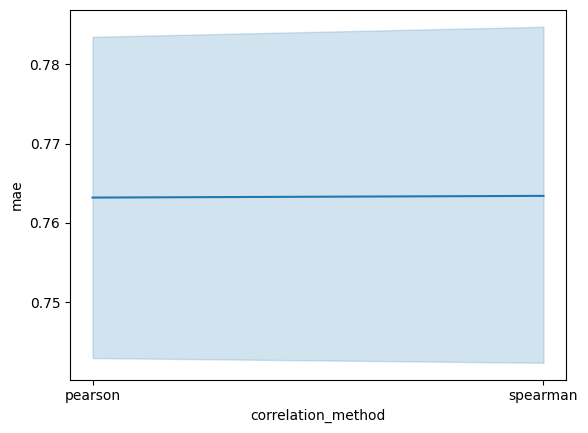

In [21]:
metrics_baseline = pd.read_csv("results/book_cf_results_baseline.csv")
metrics_spearman = pd.read_csv("results/book_cf_results_spearman.csv")

sns.lineplot(data=pd.concat([metrics_baseline, metrics_spearman], axis=0) , x="correlation_method", y="mae")

# Candidates - Minimum Number of Books Rated in Common

In [ ]:
for i, minimum_number_of_books_rated_in_common in enumerate(np.linspace(0, 100, 11)):
    params = {
        "neighborhood_method": None,
        "correlation_method": "pearson",
        "minimal_similarity": -1,
        "number_of_neighbors": 0,
        "minimum_number_of_books_rated_in_common": minimum_number_of_books_rated_in_common,
        "minimal_number_of_ratings": 1,
        "deviation_from_mean": False,
    }

    evaluator = Evaluator(ratings=ratings, params=params)
    evaluator.run_parallel(number_of_runs=number_of_runs)

    metrics = pd.DataFrame(evaluator.metrics)
    metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
    metrics.head()
    metrics.to_csv(f"results/book_cf_results_minimum_number_of_books_rated_in_common_{i}.csv")

metrics_baseline = pd.read_csv("results/book_cf_results_baseline.csv")
metrics_minimum_number_of_books_rated_in_common = np.concat([pd.read_csv(f"results/book_cf_results_minimum_number_of_books_rated_in_common_{i}.csv") for i in range(10)], axis=0)

sns.lineplot(data=pd.concat([metrics_baseline, metrics_minimum_number_of_books_rated_in_common], axis=0) , x="minimum_number_of_books_rated_in_common", y="mae")

# Neighborhood - Minimal Similarity

In [ ]:
for i, minimal_similarity in enumerate(np.linspace(0.1, 1.0, 10)):
    params = {
        "neighborhood_method": "threshold",
        "correlation_method": "pearson",
        "minimal_similarity": minimal_similarity,
        "number_of_neighbors": 0,
        "minimum_number_of_books_rated_in_common": 1,
        "minimal_number_of_ratings": 1,
        "deviation_from_mean": False,
    }

    evaluator = Evaluator(ratings=ratings, params=params)
    evaluator.run_parallel(number_of_runs=number_of_runs)

    metrics = pd.DataFrame(evaluator.metrics)
    metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
    metrics.head()
    metrics.to_csv(f"results/book_cf_results_minimal_similarity_{i}.csv")

In [ ]:
metrics_baseline = pd.read_csv("results/book_cf_results_baseline.csv")
metrics_minimal_similarity = np.concat([pd.read_csv(f"results/book_cf_results_minimal_similarity_{i}.csv") for i in range(10)], axis=0)

sns.lineplot(data=pd.concat([metrics_baseline, metrics_minimal_similarity], axis=0) , x="minimal_similarity", y="mae")

# Mean adjusted

In [15]:
params = {
    "neighborhood_method": None,
    "correlation_method": "pearson",
    "minimal_similarity": -1,
    "number_of_neighbors": 0,
    "minimum_number_of_books_rated_in_common": 1,
    "minimal_number_of_ratings": 1,
    "deviation_from_mean": True,
}

evaluator = Evaluator(ratings=ratings, params=params)
evaluator.run_parallel(number_of_runs=number_of_runs)

metrics = pd.DataFrame(evaluator.metrics)
metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
metrics.head()
metrics.to_csv("results/book_cf_results_mean_adjusted.csv")

<Axes: xlabel='deviation_from_mean', ylabel='mae'>

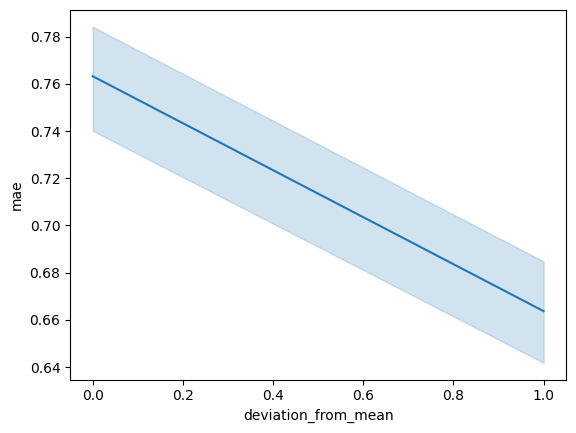

In [16]:
metrics_baseline = pd.read_csv("results/book_cf_results_baseline.csv")
metrics_mean_adjusted = pd.read_csv("results/book_cf_results_mean_adjusted.csv")

sns.lineplot(data=pd.concat([metrics_baseline, metrics_mean_adjusted], axis=0) , x="deviation_from_mean", y="mae")

<Axes: xlabel='deviation_from_mean', ylabel='mae'>

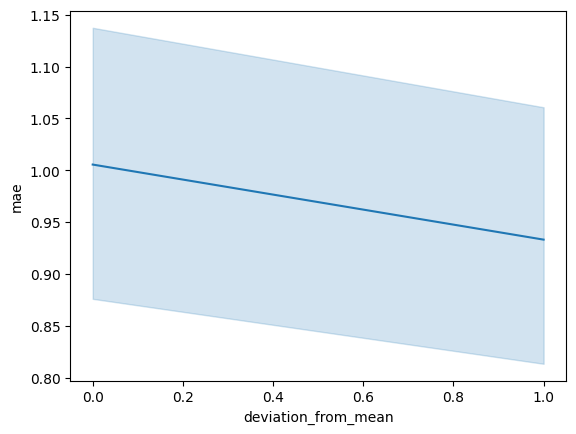

<Axes: >

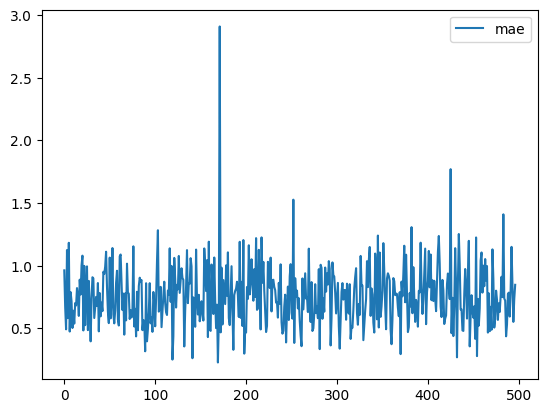

In [17]:
metrics_baseline.plot(y='mae')

In [5]:
metrics_baseline.mae.abs()

0      0.899785
1      0.554370
2      0.417979
3      1.159356
4      1.108953
         ...   
492    3.038141
493    1.261794
494    0.479209
495    0.761135
496    1.528226
Name: mae, Length: 497, dtype: float64